### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

In [50]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```python
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [2]:
df = pd.read_csv("prostate.data", sep="\t")
df = df.drop(["Unnamed: 0", "train"], axis=1)
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

```python
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

In [3]:
# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None: #defining default figsize
        figsize = (7.10, 6.70)
    n_vars = df.shape[1] #number of variables (columns) in the dataframe
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) #creating a grid of subplots with n_vars rows and n_vars columns
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars): #iterating over the rows of the grid
        for j in range(n_vars): #iterating over the columns of the grid
            axij = ax[i][j] #selecting the subplot at position (i, j)
            i_name = df.columns[i] #getting the name of the variable
            j_name = df.columns[j] 
            #removing ticks and setting margins
            axij.set_xticks([]) 
            axij.set_yticks([])
            axij.margins(0.1)
            #diagonal: variable name
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            # upper and lower triangle: scatterplot
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax #returning the figure and axes objects


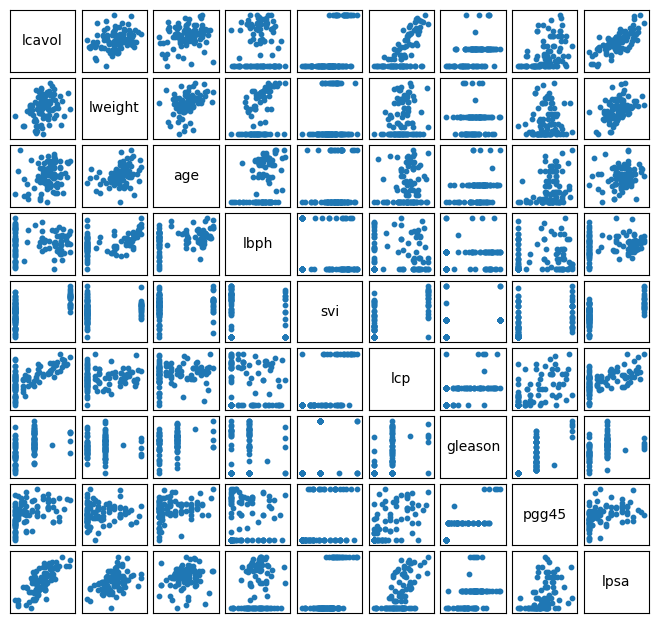

In [52]:
fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

`lpsa` and `lcp` seem to be the variables most correlated to `lcavol`.

`lweight`, `lbph`, `lcp` and `Ipsa` are floats, `age`, `gleason` and `pgg45` are integers and `svi` is a boolean.

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

Let $X$ and $Y$ two randoms vectors such that $X=(X_i)_{i=1,...,n}$ and $Y=(Y_i)_{i=1,...,n}$. 
The correlation between $X$ and $Y$ is given by the formula
$$ Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}}$$
with $Cov(X,Y)= \sum_{i=1}^{n}\frac{(X_i-\bar{X})(Y_i-\bar{Y})}{(n)}$ and $\sigma_X$, $\sigma_Y$ the standarts deviations of X and Y. 

In [12]:
def correlation(x, y):
    x = np.array(x)
    y = np.array(y)
    cov = np.mean((x - np.mean(x)) * (y - np.mean(y)))
    std_x = np.std(x)
    std_y = np.std(y)
    return cov / (std_x * std_y)

print("Manual correlation : ", correlation(df["lcavol"], df["lpsa"]))
print("Using pandas : ", df["lcavol"].corr(df["lpsa"]))


Manual correlation :  0.734460326213673
Using pandas :  0.734460326213673


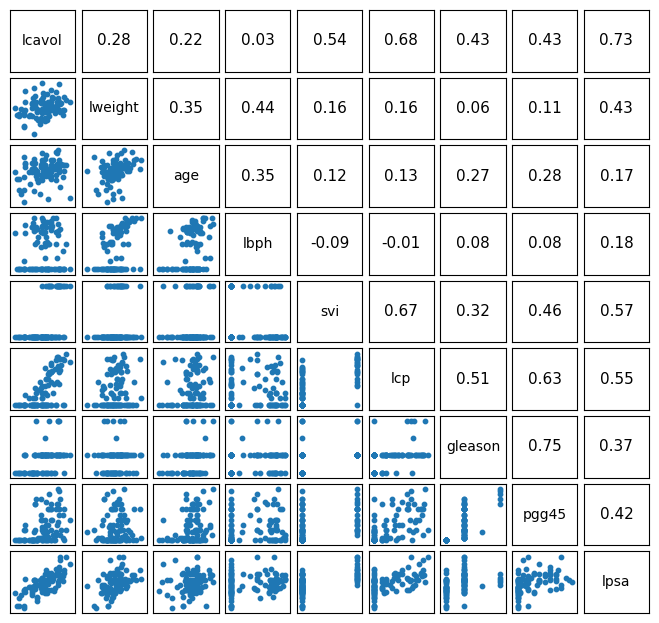

In [20]:
# New pairplot that shows correlation coefficients in the upper triangle
def pairplot_with_corr(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i == j:
                # Diagonal: variable name
                axij.text(0.5, 0.5, i_name, fontsize=10,
                          horizontalalignment='center',
                          verticalalignment='center',
                          transform=axij.transAxes)
            elif i > j:
                # Lower triangle: scatterplot
                axij.scatter(df[j_name], df[i_name], s=10)
            else:
                # Upper triangle: correlation coefficien
                corr_val = df[i_name].corr(df[j_name])
                if corr_val is not None and not np.isnan(corr_val):
                    axij.text(0.5, 0.5, f"{corr_val:.2f}", fontsize=11,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform=axij.transAxes)
    return fig, ax
fig, ax = pairplot_with_corr(df)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```python
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

**Answer** 
We want to predicte the following model : 
$lcavols : \beta_0 + \beta_1X_1 + ... + \beta_pX_p+ \epsilon$ \\
with the $\beta_i$ are unknowns parameters of the model, the $X_i$ the explicatives variables of the model (predictors) and $\epsilon$ the random error (noise).

In [7]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```python
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

- By default, `pd.get_dummies` produces boolean columns (`True`/`False`). Specifying `dtype=np.float64` converts them to floating-point numbers, which is required for the matrix operations used in linear regression ($\hat{\beta} = (X^TX)^{-1}X^Ty$).
- This avoids the **dummy variable trap** (perfect multicollinearity): for each categorical variable, the sum of all its dummy columns equals 1, making them linearly dependent on the intercept column. Dropping one dummy per categorical variable ensures the design matrix $X$ is full rank so that $X^TX$ is invertible.
- The column of ones encodes the intercept $\beta_0$ of the model. Without it, the regression would be forced through the origin.


In [8]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```python
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [54]:
import statsmodels.api as sm

y = df_enc["lcavol"]
X = df_enc.drop("lcavol", axis=1)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        18:42:49   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.9

- `svi_1` is the estimated effect on `lcavol` of having `svi = 1` vs. the reference `svi = 0`, while keeping all the other coefficient constant. The `gleason_7/8/9` coefficients measure the effect of each Gleason category relative to the reference `gleason = 6`.
- Without one-hot encoding, `gleason` would be treated as a numeric variable, wrongly assuming equally-spaced linear effects between its categories.
- Overall: $R^2 = 0.686$ (model explains ~69% of variance), and the global $F$-test is highly significant. The most influential predictors are `lpsa`, `lcp`, `age`, and `pgg45`.


**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [22]:
results.conf_int(alpha=0.05)

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


A predictor is significant at the 5% level when its confidence interval does not contain 0. Here, **`age`** $[0.002, 0.047]$, **`lcp`** $[0.234, 0.572]$, **`pgg45`** $[-0.018, -0.000]$, and **`lpsa`** $[0.370, 0.729]$ are the only significant predictors. All others (`lweight`, `lbph`, `svi_1`, `gleason_7/8/9`, `intercept`) have intervals that include 0, meaning we cannot reject the hypothesis that their true coefficient is zero.


**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [23]:
results.pvalues["lpsa"]

np.float64(2.939240646690858e-08)

We have $p-value < 0.05$ and $ 0$ don't belongs to the confident interval so lpsa is significant.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [60]:
from scipy import stats

X_np = X.values
y_np = y.values
n, p = X_np.shape

# Parameters: solve (X'X) beta = X'y (more stable than inverting X'X)
beta_hat = np.linalg.solve(X_np.T @ X_np, X_np.T @ y_np)

# p-values
residuals_np = y_np - X_np @ beta_hat
sigma2 = (residuals_np @ residuals_np) / (n - p)
se = np.sqrt(np.diag(sigma2 * np.linalg.solve(X_np.T @ X_np, np.eye(p))))
p_values = 2 * (1 - stats.t.cdf(np.abs(beta_hat / se), df=n - p))

print("beta_hat:", beta_hat)
print("p_values:", p_values)


beta_hat: [-0.0112462   0.02478241 -0.10419954  0.40275962 -0.00944383  0.5495731
 -0.22041936  0.31167619 -0.71058822  0.79013455 -1.40665404]
p_values: [9.57707489e-01 3.01499280e-02 7.69560879e-02 8.57785824e-06
 4.04774068e-02 2.93924065e-08 3.92271694e-01 1.51294991e-01
 3.51674448e-01 1.08731299e-01 1.11367559e-01]


By using `np.linalg.solve` instead of `np.linalg.inv` we avoid computing the inverse which can be numerically unstable.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

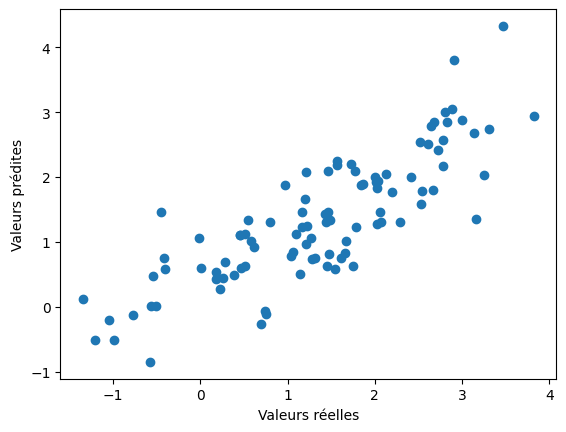

In [25]:
pred = results.get_prediction(X)
y_pred = pred.predicted_mean

plt.scatter(y, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.show()

We can see the model approximately follows a line.

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

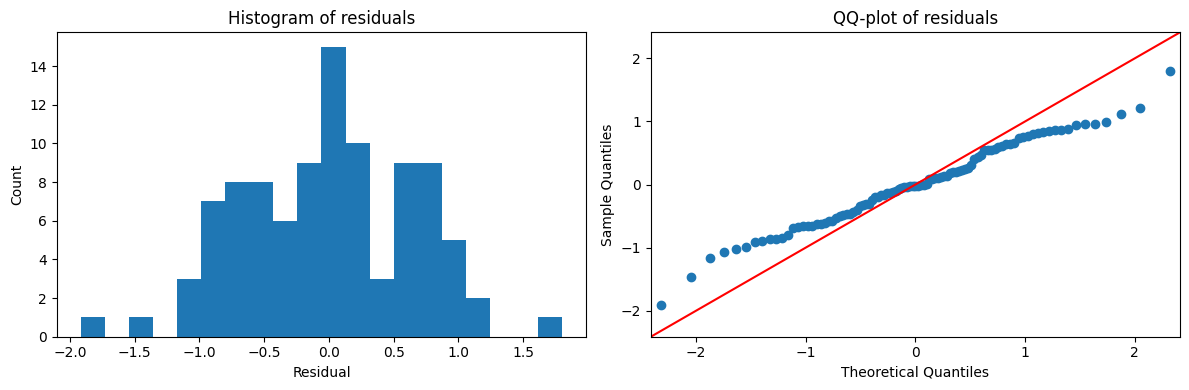

Residual Sum of Squares (RSS) = 41.8141
RSS from results.ssr          = 41.8141


In [55]:
residuals = y - y_pred

plt.hist(residuals, bins=20)
plt.show() #the histogram of the residuals looks like a normal distribution with a mean of 0 and a standard deviation of 1. 
#But we can see that there are some outliers in the histogram which can be seen in the qqplot as well.

sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("QQ-plot of residuals")

plt.tight_layout()
plt.show()

# Residual sum of squares
rss = np.sum(residuals ** 2)
print(f"Residual Sum of Squares (RSS) = {rss:.4f}")
# Also available directly from the fitted results object:
print(f"RSS from results.ssr          = {results.ssr:.4f}")


As the histogramm is roughly symmetric and the qq-plot follows the diagonal, we can assume that the error is gaussian.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [27]:
X_reduced = X.drop(["lpsa", "lcp"], axis=1)

model2 = sm.OLS(y, X_reduced).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        16:31:09   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

Removing `lpsa` and `lcp` causes $R^2$ to drop from **0.686 to 0.433** (a fall of ~0.25), which confirms that these two predictors carry a large share of the explanatory power. Both variables had very small $p$-values in the full model summary, consistent with this conclusion.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [9]:
import itertools

# Map each original predictor name to its encoded column(s)
# gleason and svi are categorical so they expand to multiple dummy columns
predictor_map = {
    'lpsa':    ['lpsa'],
    'lweight': ['lweight'],
    'age':     ['age'],
    'lbph':    ['lbph'],
    'svi':     ['svi_1'],
    'lcp':     ['lcp'],
    'gleason': ['gleason_7', 'gleason_8', 'gleason_9'],
    'pgg45':   ['pgg45'],
}
original_predictors = list(predictor_map.keys())  # 8 original predictors

def get_encoded_cols(names):
    """Expand a list of original predictor names to their encoded column names."""
    cols = []
    for name in names:
        cols.extend(predictor_map[name])
    return cols

# Compute RSS for every size-2 model (pair of original predictors + intercept)
rss_k2 = {}
for combo in itertools.combinations(original_predictors, 2):
    X_subset = X[get_encoded_cols(combo) + ['intercept']]
    res = sm.OLS(y, X_subset).fit()
    rss_k2[combo] = res.ssr  # ssr = residual sum of squares

# Sort and display results
print("RSS for all size-2 models (sorted):")
for combo, rss_val in sorted(rss_k2.items(), key=lambda x: x[1]):
    print(f"  {combo}: {rss_val:.4f}")

best_combo = min(rss_k2, key=rss_k2.get)
print(f"\nBest size-2 model: {best_combo}  (RSS = {rss_k2[best_combo]:.4f})")


RSS for all size-2 models (sorted):
  ('lpsa', 'lcp'): 47.2781
  ('lpsa', 'gleason'): 56.9457
  ('lpsa', 'svi'): 58.4522
  ('lpsa', 'pgg45'): 58.9462
  ('lpsa', 'lbph'): 59.9098
  ('lpsa', 'age'): 60.0357
  ('lpsa', 'lweight'): 61.1871
  ('lcp', 'gleason'): 67.8161
  ('lweight', 'lcp'): 68.6076
  ('age', 'lcp'): 69.9302
  ('svi', 'lcp'): 70.8092
  ('lbph', 'lcp'): 72.4042
  ('lcp', 'pgg45'): 72.5300
  ('svi', 'gleason'): 80.9438
  ('svi', 'pgg45'): 88.7356
  ('lweight', 'svi'): 89.3453
  ('age', 'svi'): 91.1062
  ('lweight', 'gleason'): 92.1622
  ('lbph', 'svi'): 93.9098
  ('gleason', 'pgg45'): 96.9875
  ('age', 'gleason'): 97.8464
  ('lbph', 'gleason'): 98.7190
  ('lweight', 'pgg45'): 100.8950
  ('age', 'pgg45'): 106.6807
  ('lbph', 'pgg45'): 108.2743
  ('lweight', 'age'): 120.4025
  ('lweight', 'lbph'): 121.3140
  ('age', 'lbph'): 126.2055

Best size-2 model: ('lpsa', 'lcp')  (RSS = 47.2781)


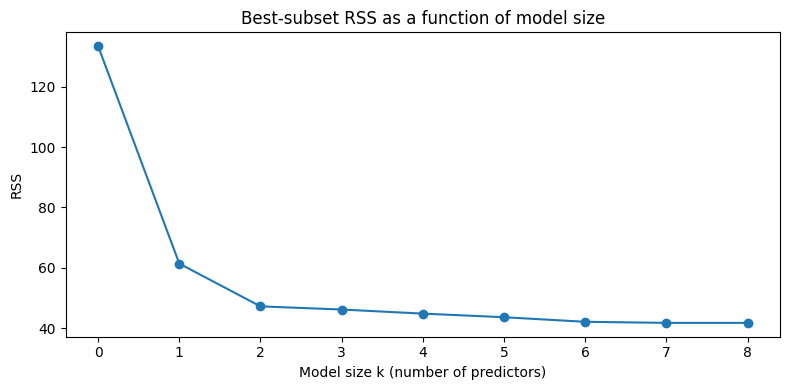

Best predictors for each model size k:
  k=0: []  (RSS = 133.3590)
  k=1: ['lpsa']  (RSS = 61.4209)
  k=2: ['lpsa', 'lcp']  (RSS = 47.2781)
  k=3: ['lpsa', 'age', 'lcp']  (RSS = 46.2378)
  k=4: ['lpsa', 'age', 'lbph', 'lcp']  (RSS = 44.8784)
  k=5: ['lpsa', 'age', 'lcp', 'gleason', 'pgg45']  (RSS = 43.6900)
  k=6: ['lpsa', 'age', 'lbph', 'lcp', 'gleason', 'pgg45']  (RSS = 42.1739)
  k=7: ['lpsa', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']  (RSS = 41.8154)
  k=8: ['lpsa', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']  (RSS = 41.8141)


In [10]:
# For each k in {0,...,8}, find the subset of k original predictors that minimizes RSS
best_rss_per_k = {}         # k -> best RSS value
best_predictors_per_k = {}  # k -> best predictor names (original)

for k in range(len(original_predictors) + 1):
    best_rss = np.inf
    best_subset = ()
    if k == 0:
        # Intercept-only model
        res = sm.OLS(y, X[['intercept']]).fit()
        best_rss = res.ssr
        best_subset = ()
    else:
        for combo in itertools.combinations(original_predictors, k):
            X_sub = X[get_encoded_cols(combo) + ['intercept']]
            res = sm.OLS(y, X_sub).fit()
            if res.ssr < best_rss:
                best_rss = res.ssr
                best_subset = combo
    best_rss_per_k[k] = best_rss
    best_predictors_per_k[k] = best_subset

# Plot RSS as a function of k
fig, ax = plt.subplots(figsize=(8, 4))
ks = list(best_rss_per_k.keys())
rss_vals = [best_rss_per_k[k] for k in ks]
ax.plot(ks, rss_vals, marker='o')
ax.set_xlabel("Model size k (number of predictors)")
ax.set_ylabel("RSS")
ax.set_title("Best-subset RSS as a function of model size")
ax.set_xticks(ks)
plt.tight_layout()
plt.show()

# Print selected predictors for each k
print("Best predictors for each model size k:")
for k in ks:
    print(f"  k={k}: {list(best_predictors_per_k[k])}  (RSS = {best_rss_per_k[k]:.4f})")


**(c)** No because increasing the model size will always result in a lower RSS if trained on the same data. This comes from the bias-variance tradeoff, a model with too many predictors will overfit the training data.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

### Answers
**(a)** In order to overcome the bias-variance tradeoff, we can use split validation. It consists of separating the dataset into two disjoint parts. The training set is used to fit the model, while the validation set is kept out of training and is used to evaluate if the model generalizes enough its prediction. If the models overfits, the validation error will rise on contrary to the training error.

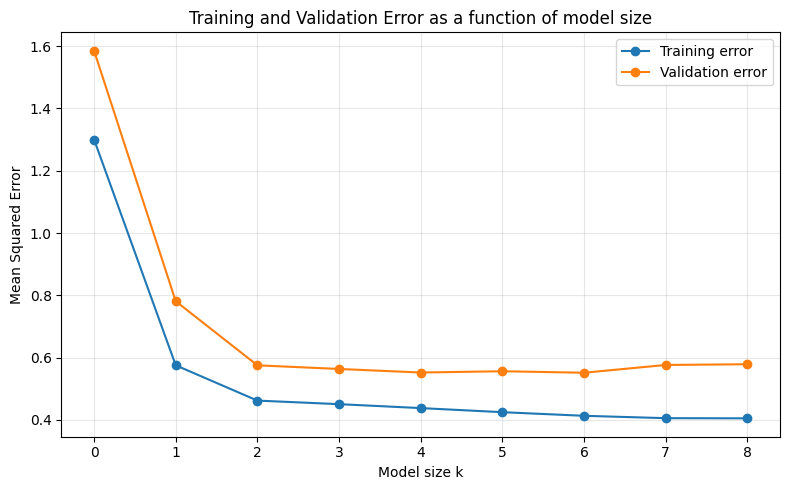

In [45]:
from sklearn.model_selection import train_test_split

# Spliting the data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

#training and validation errors for each model size k
train_errors = []
validation_errors = []
for k in range(len(original_predictors) + 1):
    if k == 0:
        X_train_k = X_train[['intercept']]
        X_validation_k = X_validation[['intercept']]
    else:
        predictors_k = best_predictors_per_k[k]
        cols_k = get_encoded_cols(predictors_k) + ['intercept']
        X_train_k = X_train[cols_k]
        X_validation_k = X_validation[cols_k]
    
    # Fit model on training set
    model_k = sm.OLS(y_train, X_train_k).fit()
    
    # predictions and errors
    y_train_pred = model_k.predict(X_train_k)
    y_validation_pred = model_k.predict(X_validation_k)
    
    # Mean squared error (MSE)
    train_errors.append(np.mean((y_train - y_train_pred) ** 2))
    validation_errors.append(np.mean((y_validation - y_validation_pred) ** 2))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(train_errors, "o-",label='Training error')
ax.plot(validation_errors, "o-", label='Validation error')
ax.set_xlabel("Model size k")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Training and Validation Error as a function of model size")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**(c)** We choose a model of size $k=4$ as it results in a low training and low validation error. Larger models do not improve validation error significantly and create a risk of overfitting. Below we refit this model on the entire dataset and report the estimated coefficients.


In [56]:
# Fit the best k=4 model on the full dataset and report its coefficients
best_k = 4
cols_best = get_encoded_cols(best_predictors_per_k[best_k]) + ['intercept']
X_best = X[cols_best]

final_model = sm.OLS(y, X_best).fit()
print(f"Best model (k={best_k})  —  predictors: {list(best_predictors_per_k[best_k])}")
print()
print(final_model.summary())


Best model (k=4)  —  predictors: ['lpsa', 'age', 'lbph', 'lcp']

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     45.35
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           5.51e-21
Time:                        18:53:54   Log-Likelihood:                -100.26
No. Observations:                  97   AIC:                             210.5
Df Residuals:                      92   BIC:                             223.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

**(d)** Split validation comes with some randomness on what data goes into which dataset. This influences the size choice. We can instead run the training on multiple splits and compute the averaged errors. This is called $k$-fold cross-validation and works as follows : 
- split the data set into $n$ folds
- train on the $n-1$ folds and validate on the remaining one
- retrain on $n-1$ folds while changing the validation fold
- rotate on every fold

compute the average error and choose the size with the lowest mean error.

In [47]:
print("Optimal k for different random splits:")
for seed in range(5): # the seed is used to get different random splits of the data
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.3, random_state=seed)
    val_errors = []
    for k in range(len(original_predictors) + 1):
        if k == 0:
            X_tr_k, X_val_k = X_tr[['intercept']], X_val[['intercept']]
        else:
            cols_k = get_encoded_cols(best_predictors_per_k[k]) + ['intercept']
            X_tr_k, X_val_k = X_tr[cols_k], X_val[cols_k]
        m = sm.OLS(y_tr, X_tr_k).fit()
        val_errors.append(np.mean((y_val - m.predict(X_val_k)) ** 2))
    print(f"  seed={seed}: best k = {np.argmin(val_errors)}  (val MSE = {min(val_errors):.4f})")

Optimal k for different random splits:
  seed=0: best k = 2  (val MSE = 0.6077)
  seed=1: best k = 5  (val MSE = 0.4124)
  seed=2: best k = 7  (val MSE = 0.5792)
  seed=3: best k = 7  (val MSE = 0.5022)
  seed=4: best k = 2  (val MSE = 0.5467)


We see that different splits give different optimal k's.

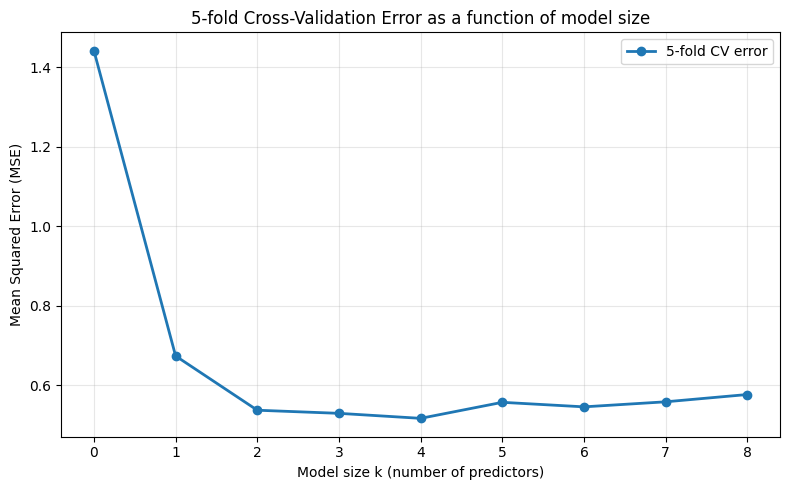


Best k according to 5-fold CV: k=4  (CV MSE = 0.5174)


In [51]:
from sklearn.model_selection import KFold

#split the dataset into 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# initialize the error array
cv_errors = np.zeros(len(original_predictors) + 1)

for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    for k in range(len(original_predictors) + 1):
        if k == 0:
            X_tr_k, X_val_k = X_tr[['intercept']], X_val[['intercept']]
        else:
            cols_k = get_encoded_cols(best_predictors_per_k[k]) + ['intercept']
            X_tr_k, X_val_k = X_tr[cols_k], X_val[cols_k]
        m = sm.OLS(y_tr, X_tr_k).fit()
        cv_errors[k] += np.mean((y_val - m.predict(X_val_k)) ** 2)

cv_errors /= kf.n_splits  # average over folds

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(cv_errors, marker='o', linewidth=2, label='5-fold CV error')
ax.set_xlabel("Model size k (number of predictors)")
ax.set_ylabel("Mean Squared Error (MSE)")
ax.set_title("5-fold Cross-Validation Error as a function of model size")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_k_cv = int(np.argmin(cv_errors))
print(f"\nBest k according to 5-fold CV: k={best_k_cv}  (CV MSE = {cv_errors[best_k_cv]:.4f})")


We find again that $k=4$ is the best model size, but this time we see more clearly that overfitting happens for larger sizes.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.

## Conclusion 

After running best-subset selection for each model size $k \in \{0, \ldots, 8\}$ and evaluating the models through both split-validation and 5-fold cross-validation, we conclude that the best model for predicting `lcavol` uses 4 predictors: `lpsa`, `age`, `lbph`, and `lcp`.

Minimizing the RSS on training data always favours larger models, which is why we used cross-validation instead. The 5-fold CV error curve shows a clear decrease from $k=0$ to $k=4$ (CV MSE ≈ 0.517), then slightly increases for $k > 4$, indicating that adding more predictors does not improve generalization and risks overfitting.

Fitted on the full dataset, the $k=4$ model achieves $R^2 = 0.663$ and adjusted $R^2 = 0.649$, very close to the full 8-predictor model ($R^2 = 0.686$) but with only half the predictors. The two most significant variables are `lpsa` ($p < 0.001$) and `lcp` ($p < 0.001$), consistent with our exploratory analysis in Exercise 1 where those variables appeared most correlated with `lcavol`. The histogram and QQ-plot of residuals show an approximately normal distribution centered at 0, supporting the Gaussian noise assumption of the model.

The best-subset selection procedure selects the optimal combination of original predictors but does not consider interactions and non-linear terms. In addition, the dataset is small ($n = 97$), so the cross-validation estimates of error may have high variance.
